In [6]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

In [7]:
df = pd.read_csv('crop_yield.csv')

In [8]:
df.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [9]:
df.shape

(19689, 10)

In [10]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [11]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [19]:
# Unique values
print("Unique Crops:", df['Crop'].nunique())
print("Unique States:", df['State'].nunique())
print("Unique Seasons:", df['Season'].unique())

Unique Crops: 55
Unique States: 30
Unique Seasons: ['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']


In [20]:
df['State'].value_counts().head(10)

State
Karnataka         1432
Andhra Pradesh    1266
West Bengal       1094
Chhattisgarh       915
Bihar              896
Madhya Pradesh     845
Uttar Pradesh      825
Tamil Nadu         822
Gujarat            817
Maharashtra        770
Name: count, dtype: int64

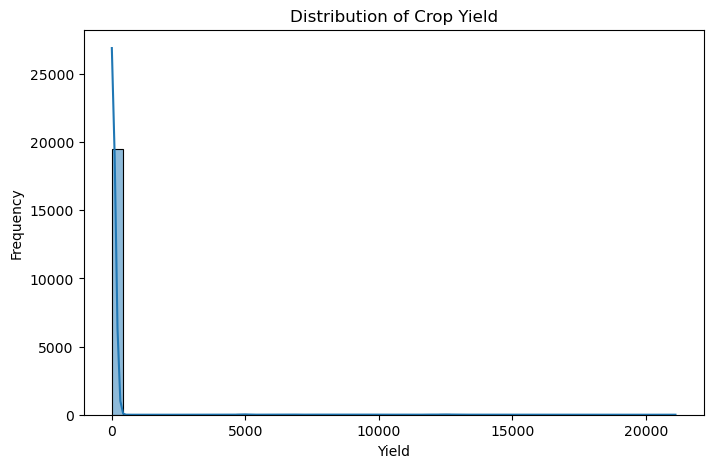

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Yield'], bins=50, kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

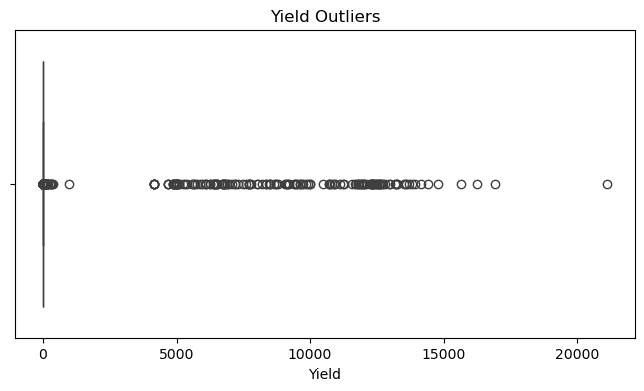

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Yield'])
plt.title("Yield Outliers")
plt.show()

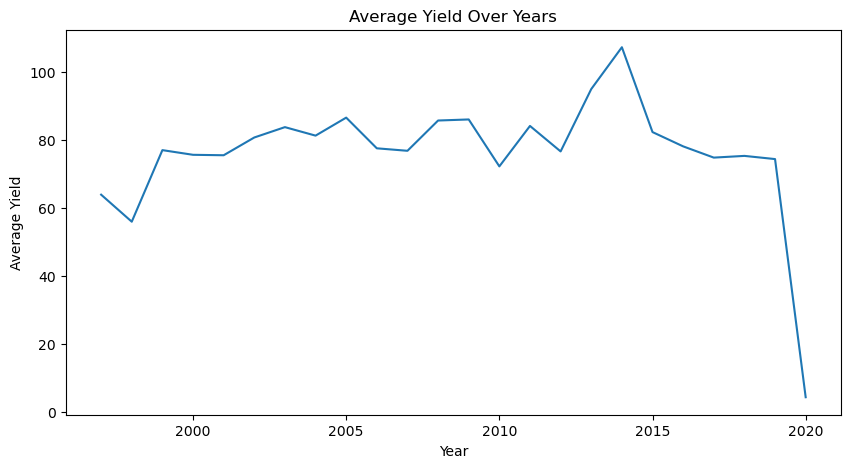

In [23]:
yearly_yield = df.groupby('Crop_Year')['Yield'].mean()

plt.figure(figsize=(10,5))
yearly_yield.plot()
plt.title("Average Yield Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.show()

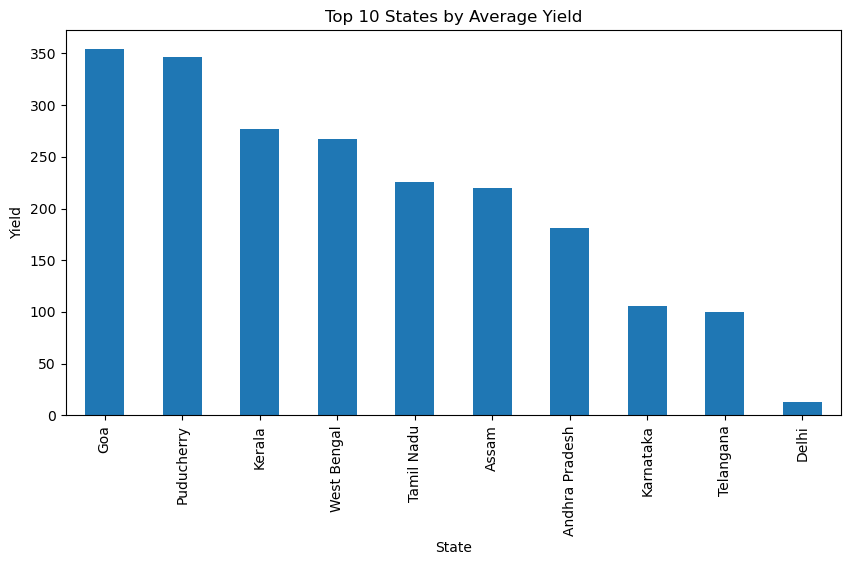

In [24]:
state_yield = df.groupby('State')['Yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
state_yield.plot(kind='bar')
plt.title("Top 10 States by Average Yield")
plt.ylabel("Yield")
plt.show()

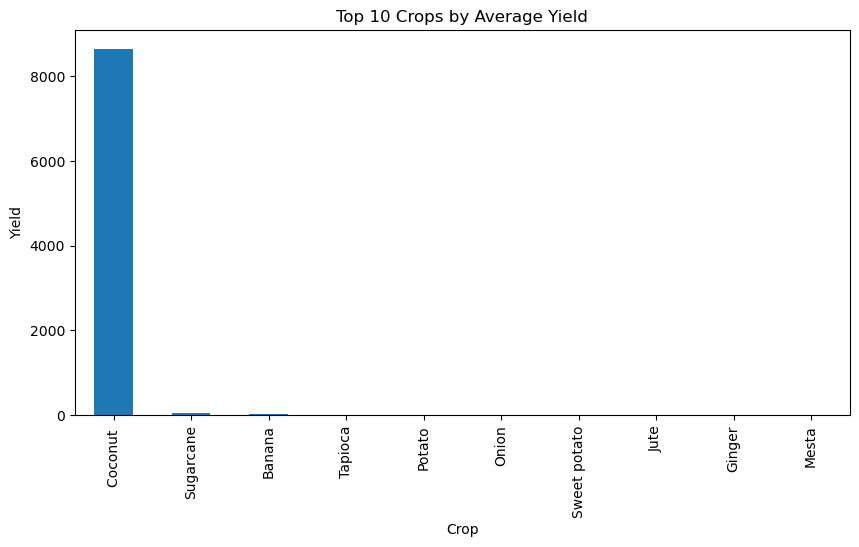

In [25]:
crop_yield = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
crop_yield.plot(kind='bar')
plt.title("Top 10 Crops by Average Yield")
plt.ylabel("Yield")
plt.show()